In [1]:
from sunbeds import Point, Square, Circle

In [4]:
import math
from pysolar.solar import *
from datetime import datetime, timedelta
import pytz
import numpy as np

In [26]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation

In [8]:
# san teodoro, sardinia
latitude =40.7839527
longitude=9.6715123

In [12]:
date = datetime(2022, 6, 18, 10, 0, 0,0)
# tz = pytz.timezone("Europe/Athens")
tz = pytz.timezone("Europe/Rome")
date=tz.localize(date)

In [13]:
alt=get_altitude(latitude, longitude, date)
az=get_azimuth(latitude,longitude,date)

In [14]:
alt, az

(44.485372333812904, 96.41382698782796)

In [15]:
square = Square(0, 0, 1,1, 2)

print(square.x1.h )

cabana = square.get_location()	
print(cabana)
shadow = square.project(alt,az)
print(shadow)

2
((0, 0), (1, 0), (1, 1), (0, 1))
((2.0235094618227336, -0.22746743653915974), (3.0235094618227336, -0.22746743653915974), (3.0235094618227336, 0.7725325634608402), (2.0235094618227336, 0.7725325634608402))


In [17]:
# results through the day

for i in range(10):
    
    date = datetime(2022, 6, 18, 9, 0, 0,0)
    tz = pytz.timezone("Europe/Rome")
    date=tz.localize(date)
    
    date = date + timedelta(minutes=60 * i)
    alt=get_altitude(latitude, longitude, date)
    az=get_azimuth(latitude,longitude,date)
    shadow_pts = square.project(alt,az)
    pts = shadow_pts
#     print(date, alt, az, pts)
    print(date, pts[0][0] - pts[2][0], pts[0][1] - pts[2][1] )
    

2022-06-18 09:00:00+02:00 -1.0000000000000004 -1.0
2022-06-18 10:00:00+02:00 -1.0 -1.0
2022-06-18 11:00:00+02:00 -1.0 -1.0
2022-06-18 12:00:00+02:00 -1.0 -1.0
2022-06-18 13:00:00+02:00 -1.0 -1.0
2022-06-18 14:00:00+02:00 -1.0 -1.0
2022-06-18 15:00:00+02:00 -1.0 -1.0
2022-06-18 16:00:00+02:00 -1.0 -1.0
2022-06-18 17:00:00+02:00 -1.0 -1.0
2022-06-18 18:00:00+02:00 -1.0 -1.0


### charting

<IPython.core.display.Javascript object>


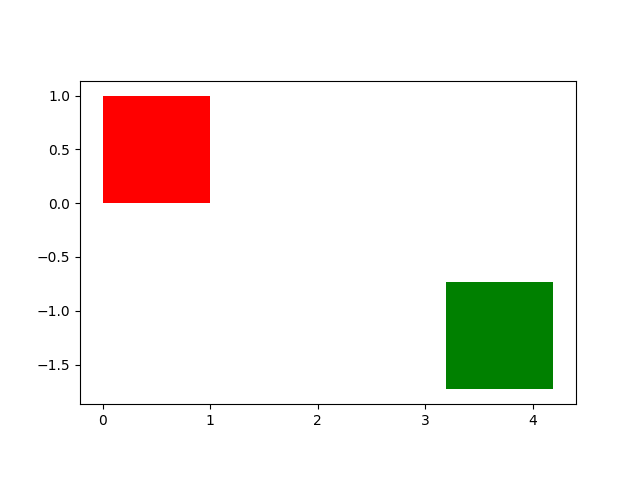

In [18]:
plt.axes()
rectangle = plt.Rectangle((0,0), 1, 1, fc='red')
rectangle2 = plt.Rectangle((3.19,-1.73), 1, 1, fc='green')
plt.gca().add_patch(rectangle)
plt.gca().add_patch(rectangle2)
plt.axis('scaled')
plt.show()

### animation!

In [10]:
square = Square(0, 0, 1,1, 2)
# shadow_pts = square.project(alt,az)

<IPython.core.display.Javascript object>


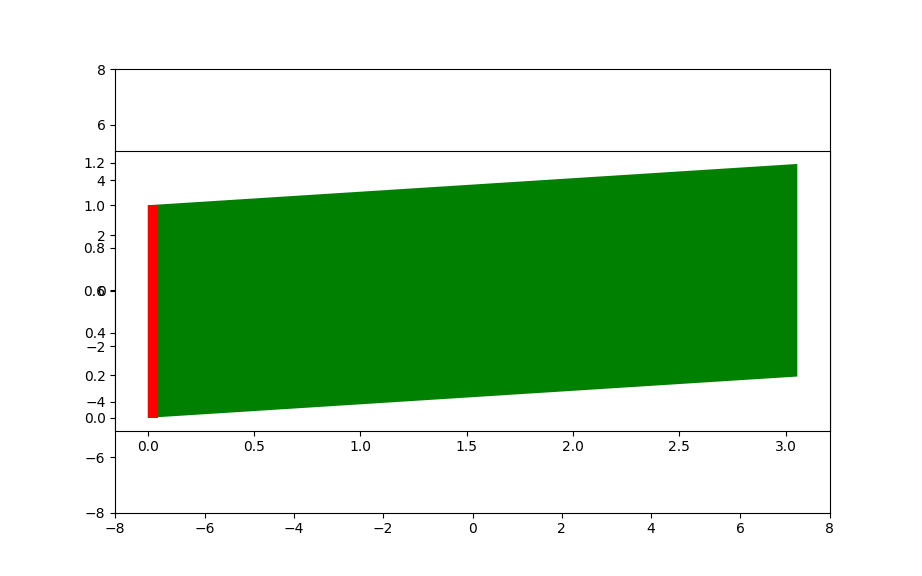

2022-06-18 09:00:00+02:00 33.15424932577889 86.36415162208301 (3.055490944659723, 0.19415457484449433)
2022-06-18 10:00:00+02:00 44.485372333812904 96.41382698782796 (2.0235094618227336, -0.22746743653915974)
2022-06-18 11:00:00+02:00 55.545031617397605 109.25456455050879 (1.2954889515630108, -0.4525207912720405)
2022-06-18 12:00:00+02:00 65.49994772920986 128.86960579198228 (0.7096369119161499, -0.5719835225080737)
2022-06-18 13:00:00+02:00 72.00200376435727 163.13630274986258 (0.18849330816392862, -0.6218207243876862)
2022-06-18 14:00:00+02:00 70.9240457648205 207.26231098610353 (-0.3168078841725962, -0.6147959587435308)
2022-06-18 15:00:00+02:00 63.17979214814275 237.1029293734269 (-0.8490166155018498, -0.5491919080302321)
2022-06-18 16:00:00+02:00 52.81464013543225 254.41201108325365 (-1.4614702161667519, -0.4077195798373719)
2022-06-18 17:00:00+02:00 41.636215445373125 266.30123699367925 (-2.2451020866082265, -0.14513556577453215)
2022-06-18 18:00:00+02:00 30.30615739932332 275.96

In [11]:
plt.axes(xlim=(-8, 8), ylim=(-8, 8))
rectangle2 = plt.Rectangle((0,0), 1, 1, fc='green')
plt.gca().add_patch(rectangle2)

for i in range(10):
    
    date = datetime(2022, 6, 18, 9, 0, 0,0)
    tz = pytz.timezone("Europe/Rome")
    date=tz.localize(date)
    
    date = date + timedelta(minutes=60 * i)
    alt=get_altitude(latitude, longitude, date)
    az=get_azimuth(latitude,longitude,date)
    shadow_pts = square.project(alt,az)
    pts = shadow_pts[0]
    print(date, alt, az, pts)
    rectangle = plt.Rectangle(pts, 1, 1, fc='red')
    plt.gca().add_patch(rectangle)
    
# plt.axis('scaled')
plt.show()    

In [23]:
def init():
    #patch.center = (5, 5)
    ax.add_patch(cabana)
    ax.add_patch(shadow)
    
    return shadow,

In [24]:
def animate(i):
    
    date = datetime(2022, 6, 18, 9, 0, 0,0)
    tz = pytz.timezone("Europe/Rome")
    date=tz.localize(date)
    
    date = date + timedelta(minutes=10 * i)
#     print(date)
    alt=get_altitude(latitude, longitude, date)
    az=get_azimuth(latitude,longitude,date)
    
    shadow_pts = square.project(alt,az)
    pts = shadow_pts[0]
    shadow.set_xy(pts)
    
    return shadow,

<IPython.core.display.Javascript object>


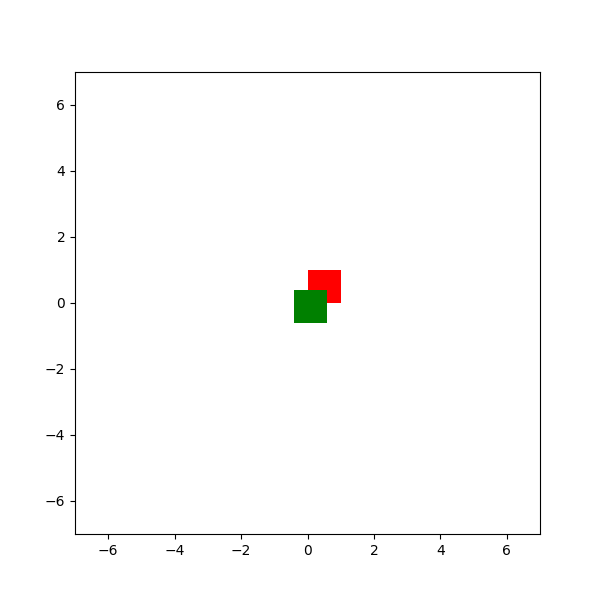

In [25]:
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 6)

ax = plt.axes(xlim=(-7, 7), ylim=(-7, 7))
cabana = plt.Rectangle((0,0), 1, 1, fc='red')
# ax.add_patch(cabana)
pts = shadow_pts[2]
shadow = plt.Rectangle(pts,1,1,fc='green')

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=100, 
                               interval=20,
                               blit=True)

plt.show()
# HTML(anim.to_html5_video())

### Circles

In [26]:
round_cabana = Circle(0,0,1,20,2)

In [27]:
# pts=[]
# for pt in round_cabana.get_points():
#     pts.append(pt.get_point())
    
# pts

cabana_pts = round_cabana.get_points()

In [28]:
date = datetime(2022, 6, 18, 9, 0, 0,0)
tz = pytz.timezone("Europe/Rome")
date=tz.localize(date)
    
#     date = date + timedelta(minutes=10 * i)
#     print(date)
alt=get_altitude(latitude, longitude, date)
az=get_azimuth(latitude,longitude,date)
    
circle_shadow_pts = round_cabana.project(alt,az)

In [29]:
x,y = [],[]
sx, sy = [],[]

for pt in pts:
    x.append(pt[0])
    y.append(pt[1])
    
for pt in circle_shadow_pts:
    sx.append(pt[0])
    sy.append(pt[1])
    

TypeError: 'float' object is not subscriptable

<IPython.core.display.Javascript object>


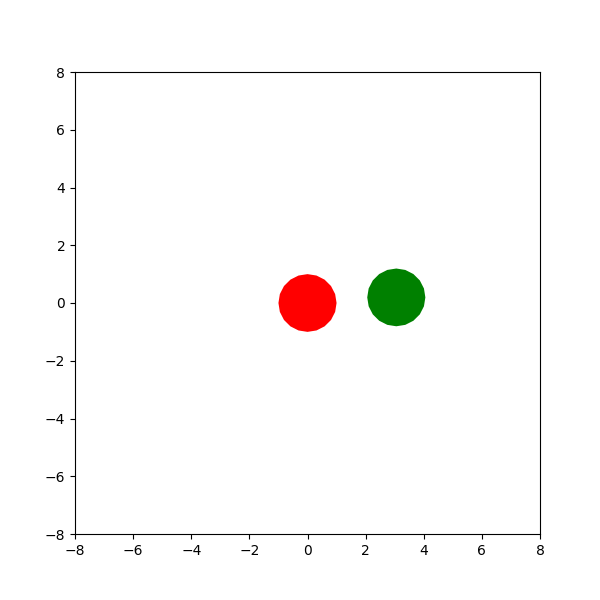

In [30]:

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 6)

ax = plt.axes(xlim=(-8, 8), ylim=(-8, 8))
# plt.scatter(x,y)
# plt.scatter(sx,sy)
cab_poly = plt.Polygon(cabana_pts, fc='red')
shad_poly = plt.Polygon(circle_shadow_pts, fc='green')
plt.gca().add_patch(cab_poly)
plt.gca().add_patch(shad_poly)

plt.show()

<IPython.core.display.Javascript object>


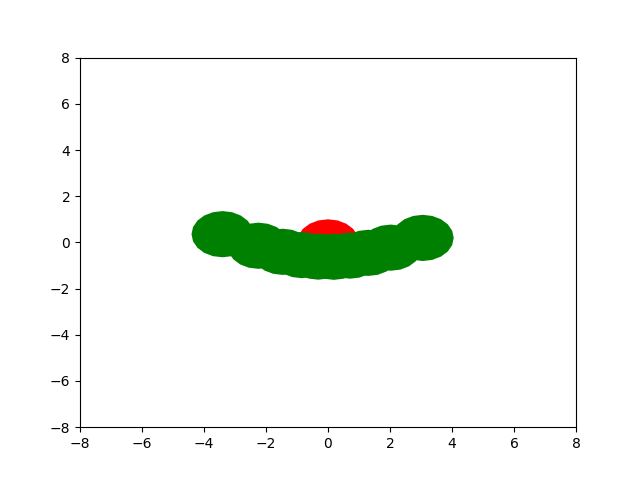

In [48]:
plt.axes(xlim=(-8, 8), ylim=(-8, 8))
cab_poly = plt.Polygon(cabana_pts, fc='red')
plt.gca().add_patch(cab_poly)

for i in range(10):
    
    date = datetime(2022, 6, 18, 9, 0, 0,0)
    tz = pytz.timezone("Europe/Rome")
    date=tz.localize(date)
    
    date = date + timedelta(minutes=60 * i)
    alt=get_altitude(latitude, longitude, date)
    az=get_azimuth(latitude,longitude,date)
    shadow_pts = round_cabana.project(alt,az)
    
    shad_poly = plt.Polygon(shadow_pts, fc='green')
    plt.gca().add_patch(shad_poly)
    
# plt.axis('scaled')
plt.show()   

### Side umbrella

In [12]:
class SideUmbrella:
    
	#x1 # top left
	#x2 # top right
	#y1 # bottom left
	#y2 # bottom right
	
#e.g. [(x1, y1, h1), (x2, y2, h2), (x3, y3)]
	
	def __init__(self, tl, tr, bl, br):
		self.x1=Point(*tl)
		self.x2=Point(*tr)
		self.y1 = Point(*bl)
		self.y2 = Point(*br)
		
	def get_location(self):
		return (self.x1.get_point(), self.x2.get_point(), self.y2.get_point(), self.y1.get_point()) 

	def project(self,alt_angle,az_angle):
		
		return (self.x1.project(alt_angle,az_angle), self.x2.project(alt_angle,az_angle), self.y2.project(alt_angle,az_angle), self.y1.project(alt_angle,az_angle))

41.636215445373125 266.30123699367925


<IPython.core.display.Javascript object>


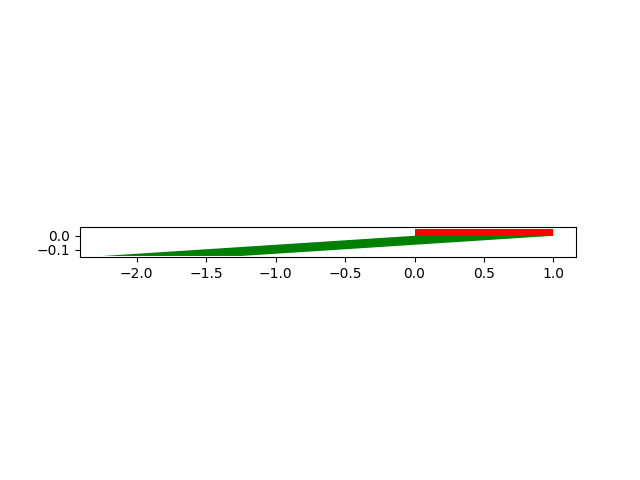

In [57]:
date = datetime(2022, 6, 18, 17, 0, 0,0)
tz = pytz.timezone("Europe/Rome")
date=tz.localize(date)


alt=get_altitude(latitude, longitude, date)
az=get_azimuth(latitude,longitude,date)

tl= (0,0,2)
tr = (1,0,2)
bl=(0,0,0)
br =(1,0,0)

squareside = SideUmbrella(tl,tr,bl,br)
shadow_pts = squareside.project(alt,az)

print(alt,az)


plt.axes()
rectangle = plt.Rectangle((0,0), 1, 0.05, fc='red')
# rectangle2 = plt.Rectangle((3.19,-1.73), 1, 1, fc='green')
shape2 = plt.Polygon(shadow_pts,closed=True, fc='green')

plt.gca().add_patch(shape2)
plt.gca().add_patch(rectangle)

plt.axis('scaled')
plt.show()

In [44]:
tl= (0,0,2)
tr = (1,0,2)
bl=(0,0,0)
br =(1,0,0)

squareside = SideUmbrella(tl,tr,bl,br)
shadow_pts = squareside.project(alt,az)

<IPython.core.display.Javascript object>


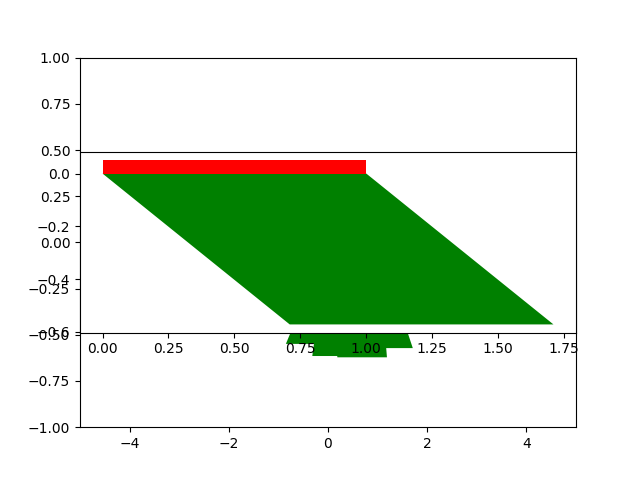

In [49]:
plt.axes(xlim=(-5, 5), ylim=(-1, 1))
cab_poly = plt.Rectangle((0,0), 1, 0.05, fc='red')
# plt.gca().add_patch(cab_poly)

for i in range(10):
    
    date = datetime(2022, 6, 18, 9, 0, 0,0)
    tz = pytz.timezone("Europe/Rome")
    date=tz.localize(date)
    
    date = date + timedelta(minutes=60 * i)
    alt=get_altitude(latitude, longitude, date)
    az=get_azimuth(latitude,longitude,date)
    shadow_pts = squareside.project(alt,az)
    
    shad_poly = plt.Polygon(shadow_pts, fc='green')
    plt.gca().add_patch(shad_poly)
    

plt.gca().add_patch(cab_poly)    
# plt.axis('scaled')
plt.show()   